In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
df1=pd.read_csv("left employee.csv")
df1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Existing or Left
0,1,0.1,0.89,2,157,3,0,0,sales,low,0
1,2,0.1,0.89,5,262,6,0,0,sales,low,0
2,3,0.1,0.89,7,272,4,0,0,sales,low,0
3,4,0.1,0.89,5,223,5,0,0,sales,low,0
4,5,0.1,0.89,2,159,3,0,0,sales,low,0


In [0]:
df1[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,0.422708,0.728549,3.855503,207.419210,3.876505,0.047326,0.005321
std,0.268238,0.196215,1.818165,61.202825,0.977698,0.212364,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,0.110000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,0.400000,0.810000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,0.700000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


In [0]:
df=pd.read_csv("Existing EmployeesX.csv")
df.head(n=10)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Existing or Left
0,1,0.1,0.89,2,157,3,0,0,sales,low,0
1,2,0.1,0.89,5,262,6,0,0,sales,low,0
2,3,0.1,0.89,7,272,4,0,0,sales,low,0
3,4,0.1,0.89,5,223,5,0,0,sales,low,0
4,5,0.1,0.89,2,159,3,0,0,sales,low,0
5,6,0.1,0.89,2,153,3,0,0,sales,low,0
6,7,0.1,0.89,6,247,4,0,0,sales,low,0
7,8,0.1,0.89,5,259,5,0,0,sales,low,0
8,9,0.1,0.89,5,224,5,0,0,sales,low,0
9,10,0.1,0.89,2,142,3,0,0,sales,low,0


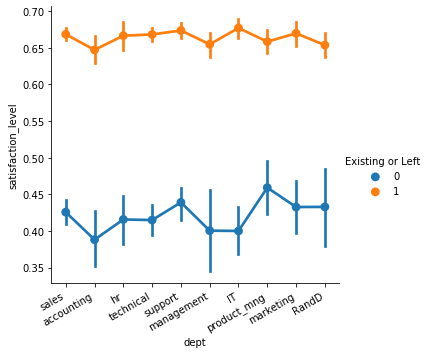

In [0]:
ax = sns.catplot(y='satisfaction_level',x='dept',hue='Existing or Left',kind='point',data=df)
ax.fig.autofmt_xdate()

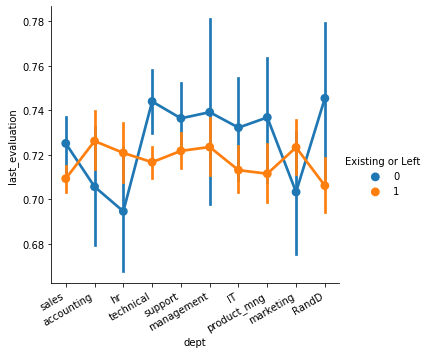

In [0]:
ax = sns.catplot(y='last_evaluation',x='dept',hue='Existing or Left',kind='point',data=df)
ax.fig.autofmt_xdate()

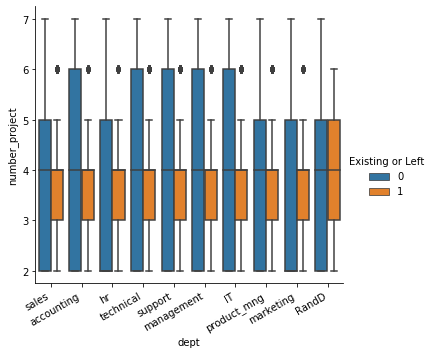

In [0]:
ax = sns.catplot(y='number_project',x='dept',hue='Existing or Left',kind='box',data=df)
ax.fig.autofmt_xdate()
# sns.catplot(x="day", y="total_bill", hue="sex", kind="box", data=tips);

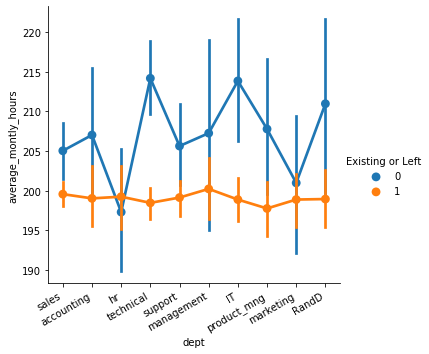

In [0]:
ax = sns.catplot(y='average_montly_hours',x='dept',hue='Existing or Left',kind='point',data=df)
ax.fig.autofmt_xdate()

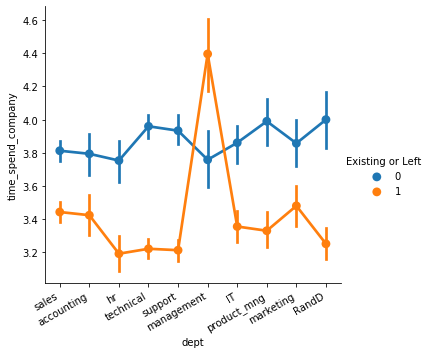

In [0]:
ax = sns.catplot(y='time_spend_company',x='dept',hue='Existing or Left',kind='point',data=df)
ax.fig.autofmt_xdate()

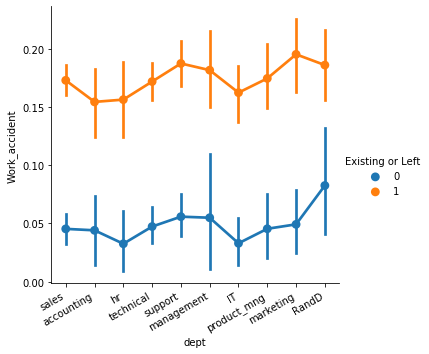

In [0]:
ax = sns.catplot(y='Work_accident',x='dept',hue='Existing or Left',kind='point',data=df)
ax.fig.autofmt_xdate()

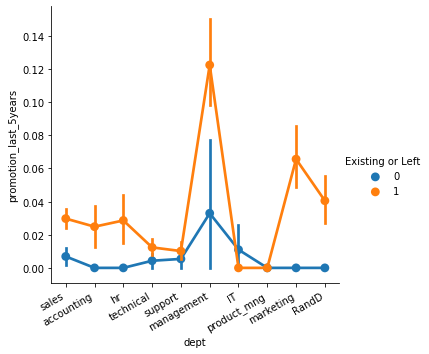

In [0]:
ax = sns.catplot(y='promotion_last_5years',x='dept',hue='Existing or Left',kind='point',data=df)
ax.fig.autofmt_xdate()

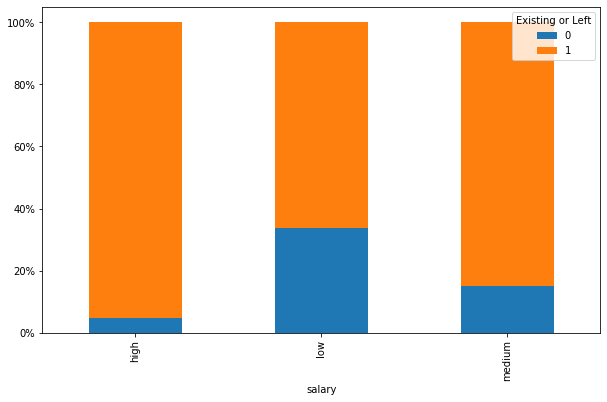

In [0]:
import matplotlib.ticker as mtick
df.groupby(['salary','Existing or Left']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, figsize=(10,6))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

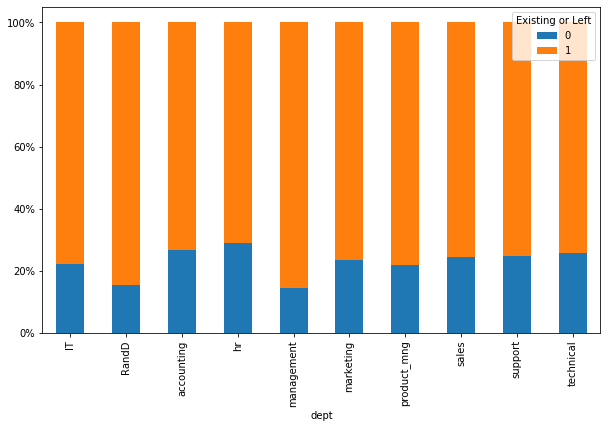

In [0]:
import matplotlib.ticker as mtick
df.groupby(['dept','Existing or Left']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True, figsize=(10,6))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()


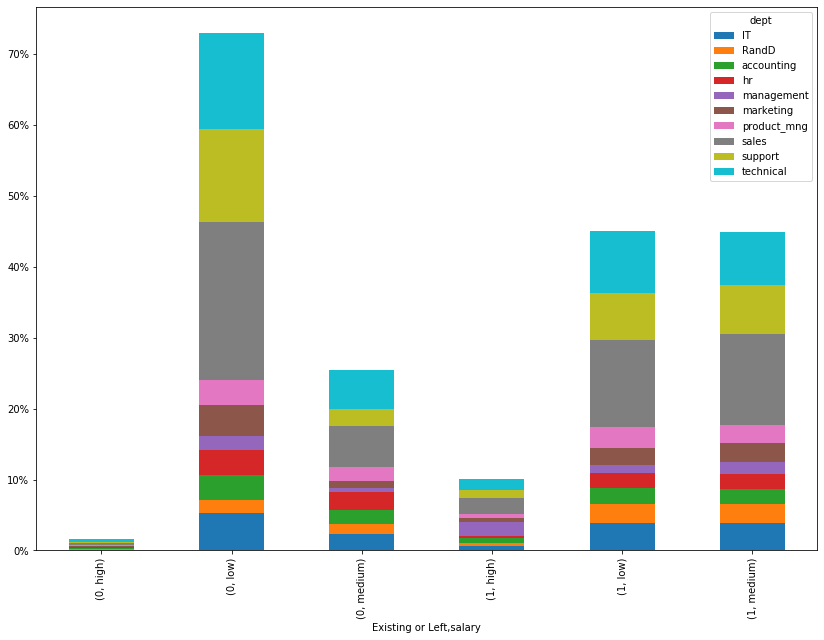

In [0]:

import matplotlib.ticker as mtick
df.groupby(['Existing or Left','salary','dept']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True,figsize=(14,10))

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()


In [0]:
df['dept'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [0]:
d4={'low':100,'medium':50,'high':25}
df['salary']=df['salary'].map(d4)

In [0]:
df1=pd.get_dummies(df,prefix=['dept'])
df1.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Existing or Left,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,1,0.1,0.89,2,157,3,0,0,100,0,0,0,0,0,0,0,0,1,0,0
1,2,0.1,0.89,5,262,6,0,0,100,0,0,0,0,0,0,0,0,1,0,0
2,3,0.1,0.89,7,272,4,0,0,100,0,0,0,0,0,0,0,0,1,0,0
3,4,0.1,0.89,5,223,5,0,0,100,0,0,0,0,0,0,0,0,1,0,0
4,5,0.1,0.89,2,159,3,0,0,100,0,0,0,0,0,0,0,0,1,0,0


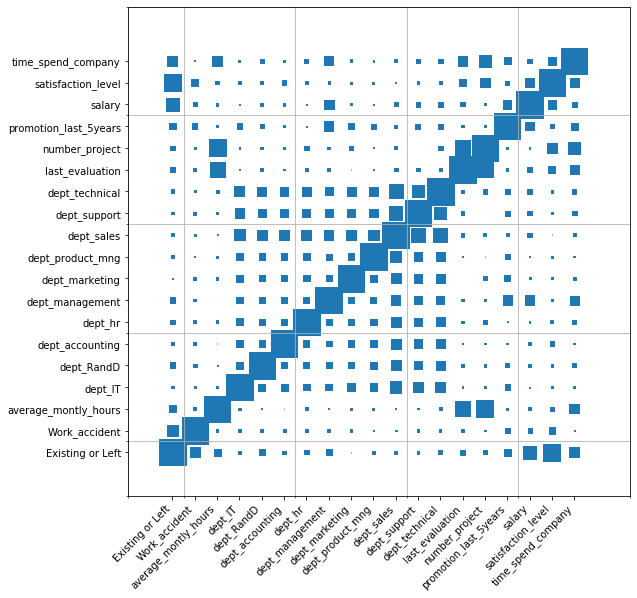

In [0]:
def heatmap(x, y, size):
    fig, ax = plt.subplots(figsize=(9,9))
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 350
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
        
    )
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
features=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary','dept_IT','dept_RandD','dept_accounting','dept_hr','dept_management','dept_marketing','dept_product_mng','dept_sales','dept_support','dept_technical','Existing or Left']
corr = df1[features].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()*2
)

In [0]:
features=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary','dept_IT','dept_RandD','dept_accounting','dept_hr','dept_management','dept_marketing','dept_product_mng','dept_sales','dept_support','dept_technical']
X=df1[features]
y=df1['Existing or Left']

In [0]:
scaler = StandardScaler().fit(X)
x = scaler.transform(X)

In [0]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(X,y,test_size=0.25,random_state=0)

In [0]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf')
clf.fit(trainx,trainy)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
ypredict=clf.predict(testx)
clf.score(testx,testy)

0.9482666666666667

In [0]:
clf1 = RandomForestClassifier()
clf1.fit(trainx, trainy)
clf1.score(trainx,trainy)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9990221353009157

In [0]:

param_grid = {
    'n_estimators': [21, 20,22],
    'max_depth': [23,24, 21,20]
}
gridsearch = GridSearchCV(RandomForestClassifier(n_jobs = -1), 
                          param_grid=param_grid, 
                          scoring='accuracy', cv=3, 
                          return_train_score=True, verbose=10)
gridsearch.fit(trainx,trainy)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=23, n_estimators=21 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=23, n_estimators=21, score=(train=0.999, test=0.985), total=   1.2s
[CV] max_depth=23, n_estimators=21 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  max_depth=23, n_estimators=21, score=(train=0.999, test=0.983), total=   0.2s
[CV] max_depth=23, n_estimators=21 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV]  max_depth=23, n_estimators=21, score=(train=1.000, test=0.985), total=   0.2s
[CV] max_depth=23, n_estimators=20 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s


[CV]  max_depth=23, n_estimators=20, score=(train=1.000, test=0.986), total=   0.2s
[CV] max_depth=23, n_estimators=20 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV]  max_depth=23, n_estimators=20, score=(train=1.000, test=0.985), total=   0.2s
[CV] max_depth=23, n_estimators=20 ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s remaining:    0.0s


[CV]  max_depth=23, n_estimators=20, score=(train=0.999, test=0.984), total=   0.2s
[CV] max_depth=23, n_estimators=22 ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.1s remaining:    0.0s


[CV]  max_depth=23, n_estimators=22, score=(train=1.000, test=0.985), total=   0.3s
[CV] max_depth=23, n_estimators=22 ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.4s remaining:    0.0s


[CV]  max_depth=23, n_estimators=22, score=(train=0.999, test=0.986), total=   0.3s
[CV] max_depth=23, n_estimators=22 ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.8s remaining:    0.0s


[CV]  max_depth=23, n_estimators=22, score=(train=0.999, test=0.985), total=   0.3s
[CV] max_depth=24, n_estimators=21 ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.1s remaining:    0.0s


[CV]  max_depth=24, n_estimators=21, score=(train=0.999, test=0.986), total=   0.2s
[CV] max_depth=24, n_estimators=21 ...................................
[CV]  max_depth=24, n_estimators=21, score=(train=0.999, test=0.985), total=   0.2s
[CV] max_depth=24, n_estimators=21 ...................................
[CV]  max_depth=24, n_estimators=21, score=(train=0.999, test=0.985), total=   0.2s
[CV] max_depth=24, n_estimators=20 ...................................
[CV]  max_depth=24, n_estimators=20, score=(train=1.000, test=0.985), total=   0.2s
[CV] max_depth=24, n_estimators=20 ...................................
[CV]  max_depth=24, n_estimators=20, score=(train=0.999, test=0.986), total=   0.2s
[CV] max_depth=24, n_estimators=20 ...................................
[CV]  max_depth=24, n_estimators=20, score=(train=1.000, test=0.984), total=   0.2s
[CV] max_depth=24, n_estimators=22 ...................................
[CV]  max_depth=24, n_estimators=22, score=(train=0.999, test=0.985), 

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   13.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [0]:
pd.DataFrame(gridsearch.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,0.132023,0.003463,0.104028,0.000069,23,20,"{'max_depth': 23, 'n_estimators': 20}",0.986400,0.985067,0.983996,0.985154,0.000983,1,0.999867,0.999733,0.999333,0.999644,0.000227
3,0.136410,0.002468,0.104114,0.000086,24,21,"{'max_depth': 24, 'n_estimators': 21}",0.986400,0.984533,0.984529,0.985154,0.000881,1,0.999467,0.999333,0.999333,0.999378,0.000063
2,0.151777,0.004113,0.104573,0.000527,23,22,"{'max_depth': 23, 'n_estimators': 22}",0.984800,0.985600,0.984796,0.985065,0.000378,3,0.999733,0.999333,0.999467,0.999511,0.000166
10,0.129238,0.002132,0.104169,0.000064,20,20,"{'max_depth': 20, 'n_estimators': 20}",0.985600,0.984267,0.985329,0.985065,0.000575,3,0.999467,0.999067,0.998667,0.999067,0.000327
4,0.132571,0.005441,0.104139,0.000033,24,20,"{'max_depth': 24, 'n_estimators': 20}",0.984533,0.985600,0.983729,0.984621,0.000766,5,0.999733,0.999067,0.999733,0.999511,0.000314
6,0.137957,0.005541,0.104270,0.000074,21,21,"{'max_depth': 21, 'n_estimators': 21}",0.986133,0.984000,0.983729,0.984621,0.001075,5,0.999600,0.999333,0.999200,0.999378,0.000166
8,0.144876,0.003666,0.104204,0.000127,21,22,"{'max_depth': 21, 'n_estimators': 22}",0.986133,0.985067,0.982395,0.984532,0.001572,7,0.999600,0.999067,0.999600,0.999422,0.000251
0,0.466461,0.459265,0.104623,0.000403,23,21,"{'max_depth': 23, 'n_estimators': 21}",0.985067,0.982933,0.985329,0.984443,0.001073,8,0.999333,0.998533,0.999600,0.999155,0.000453
5,0.143923,0.001192,0.104129,0.000069,24,22,"{'max_depth': 24, 'n_estimators': 22}",0.985067,0.984267,0.983996,0.984443,0.000455,8,0.999467,0.998800,0.999733,0.999333,0.000393
11,0.146438,0.003081,0.104176,0.000064,20,22,"{'max_depth': 20, 'n_estimators': 22}",0.984267,0.985333,0.982395,0.983999,0.001214,10,0.999467,0.998666,0.999067,0.999067,0.000327


In [0]:
clf1  = RandomForestClassifier(max_depth = 21, 
                             n_estimators = 22, 
                             n_jobs = -1,random_state=1)
clf1.fit(trainx, trainy)
clf1.score(testx,testy)

0.9890666666666666

In [0]:
df2=pd.read_csv("Existing.csv")
df2.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,14211,0.50,0.73,4,180,3,0,0,IT,low
1,14210,0.33,0.65,3,172,10,0,1,marketing,high
2,14209,0.85,0.54,3,185,10,0,1,management,high
3,14208,0.74,0.95,5,266,10,0,1,management,high
4,14207,0.90,0.55,3,259,10,1,1,management,high


In [0]:
y10=df2['dept']
y11=df2['salary']

In [0]:
d4={'low':100,'medium':50,'high':25}
df2['salary']=df2['salary'].map(d4)
df2=pd.get_dummies(df2,prefix=['dept'])

In [0]:
# from sklearn.model_selection import cross_val_score, cross_val_predict
# y=cross_val_predict(clf1, df2[features],y, cv=6)
 y=clf1.predict(df2[features])
y

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
features1=['Emp ID','satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']
df3=df2[features1]
df3['salary']=y11
df3['dept']=y10
df3['Existing or Left']=y
df3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dept,Existing or Left
0,14211,0.50,0.73,4,180,3,0,0,low,IT,1
1,14210,0.33,0.65,3,172,10,0,1,high,marketing,1
2,14209,0.85,0.54,3,185,10,0,1,high,management,1
3,14208,0.74,0.95,5,266,10,0,1,high,management,1
4,14207,0.90,0.55,3,259,10,1,1,high,management,1


In [0]:

df3.to_csv('Future_leftX.csv')